In [4]:
# ===============================
# Deliverable 4: Car Price Prediction & Insights
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report


In [6]:
# ---------------------------------
# 1. Load Dataset
# ---------------------------------
df = pd.read_csv("CarPrice_Assignment.csv")

# Extract manufacturer from CarName
df['car_company'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['car_company'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda'
}, inplace=True)


df.head()

/tmp/ipython-input-2035754022.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['car_company'].replace({


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
# ---------------------------------
# 2. EDA & Feature Engineering
# ---------------------------------
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

Dataset Shape: (205, 27)
Missing Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_company         0
dtype: int64
Duplicates: 0


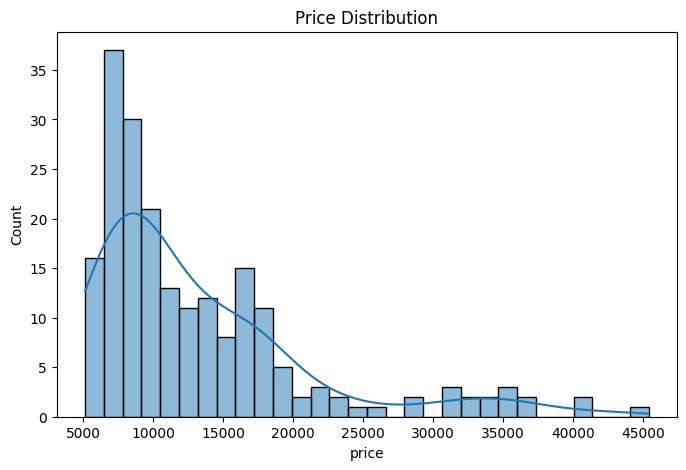

In [9]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

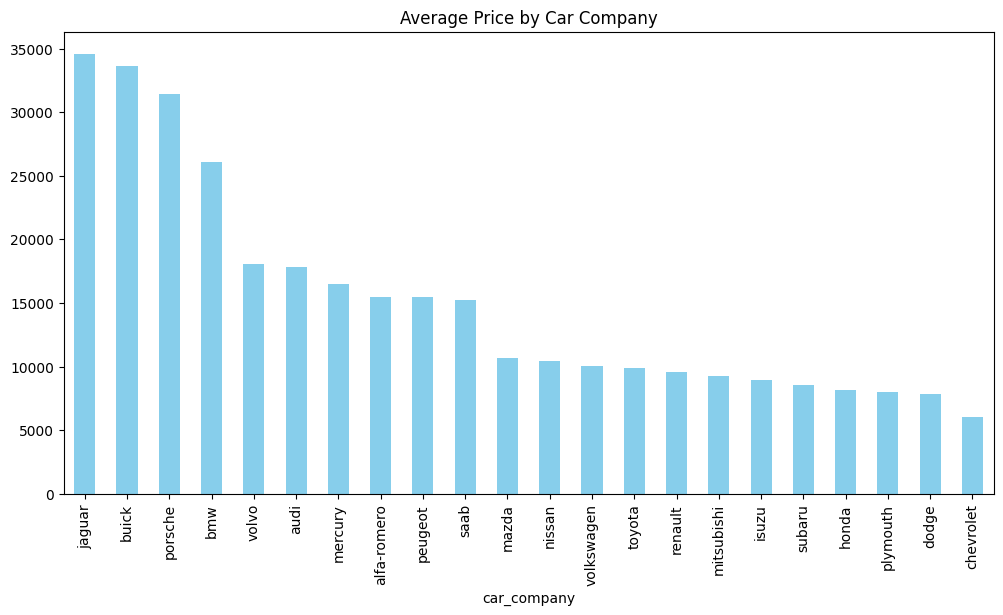

In [10]:
# Average price by car company
avg_price_by_company = df.groupby('car_company')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_by_company.plot(kind='bar', color='skyblue')
plt.title("Average Price by Car Company")
plt.show()

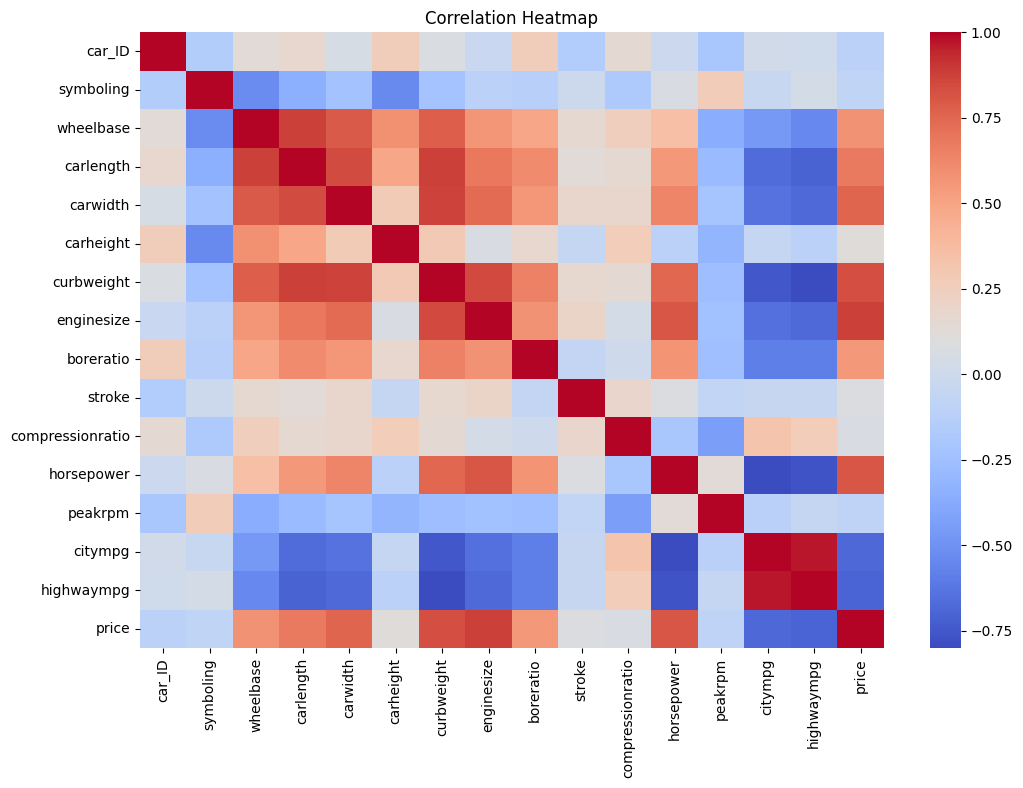

In [11]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [13]:
# ---------------------------------
# 3. Regression Model
# ---------------------------------
X = df_encoded.drop(['price', 'car_ID'], axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

reg_r2 = r2_score(y_test, y_pred)
reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Regression R²:", reg_r2)
print("Regression RMSE:", reg_rmse)

Regression R²: 0.8464393436252392
Regression RMSE: 3481.766170084237


In [14]:
# ---------------------------------
# 4. Classification Model
# ---------------------------------
df_encoded['price_cat'] = pd.qcut(df['price'], q=3, labels=['Low', 'Mid', 'High'])
X_c = df_encoded.drop(['price', 'price_cat', 'car_ID'], axis=1)
y_c = df_encoded['price_cat']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

clf_acc = accuracy_score(y_test_c, y_pred_c)
print("Classification Accuracy:", clf_acc)
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))

Classification Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

        High       0.62      1.00      0.77        10
         Low       0.87      0.87      0.87        15
         Mid       0.80      0.50      0.62        16

    accuracy                           0.76        41
   macro avg       0.76      0.79      0.75        41
weighted avg       0.78      0.76      0.74        41



In [15]:
# ---------------------------------
# 5. Clustering
# ---------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster Counts:\n", df['cluster'].value_counts())

Cluster Counts:
 cluster
1    103
2     54
0     48
Name: count, dtype: int64


In [16]:
# ---------------------------------
# 6. Association Rule Mining (Manual Apriori)
# ---------------------------------
def manual_apriori(transactions, min_support=0.1):
    from itertools import combinations
    item_counts = {}
    total_trans = len(transactions)

    # Single items
    for trans in transactions:
        for item in trans:
            item_counts[(item,)] = item_counts.get((item,), 0) + 1

    # Filter by support
    freq_items = {item: count for item, count in item_counts.items() if count/total_trans >= min_support}

    # Pairs
    for trans in transactions:
        for pair in combinations(trans, 2):
            pair = tuple(sorted(pair))
            item_counts[pair] = item_counts.get(pair, 0) + 1

    freq_pairs = {pair: count for pair, count in item_counts.items() if len(pair) == 2 and count/total_trans >= min_support}

    return freq_items, freq_pairs

# Example: Using some car attributes as transactions
transactions = df[['fueltype', 'aspiration', 'carbody']].values.tolist()
freq_items, freq_pairs = manual_apriori(transactions, min_support=0.1)

print("Frequent Items:", freq_items)
print("Frequent Pairs:", freq_pairs)

Frequent Items: {('gas',): 185, ('std',): 168, ('hatchback',): 70, ('sedan',): 96, ('wagon',): 25, ('turbo',): 37}
Frequent Pairs: {('gas', 'std'): 161, ('gas', 'hatchback'): 69, ('hatchback', 'std'): 57, ('gas', 'sedan'): 81, ('sedan', 'std'): 78, ('gas', 'wagon'): 22, ('gas', 'turbo'): 24}
